In [1]:
from coffea.nanoevents import NanoAODSchema,NanoEventsFactory
from coffea import processor
from coffea.analysis_tools import PackedSelection
import hist
from snippets import *
import awkward as ak
import numpy as np

In [2]:
events = NanoEventsFactory.from_root(
    "/commonfs/store/data/Run2018B/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/250000/7B7A01B5-FE11-5944-B73B-1FF6CB58CB83.root",
    schemaclass=NanoAODSchema.v7,
    metadata={
        "dataset":"MET_Run2018"
    }
).events()

In [3]:
eventsMC = NanoEventsFactory.from_root(
    "/commonfs/store/mc/RunIISummer20UL18NanoAODv9/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/0520A050-AF68-EF43-AA5B-5AA77C74ED73.root",
    schemaclass=NanoAODSchema.v7,
    metadata={
        "dataset":"TTToSemiLeptonic"
    }
).events()

In [4]:
cutflow={}
cutflow["No cuts"] = len(events)

In [5]:
print(ak.sum(ak.num(events.Electron)))
triggered_events = events[events.HLT.Ele32_WPTight_Gsf]
print(ak.sum(ak.num(triggered_events.Electron)))

1033303
20194


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efa2c030c10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

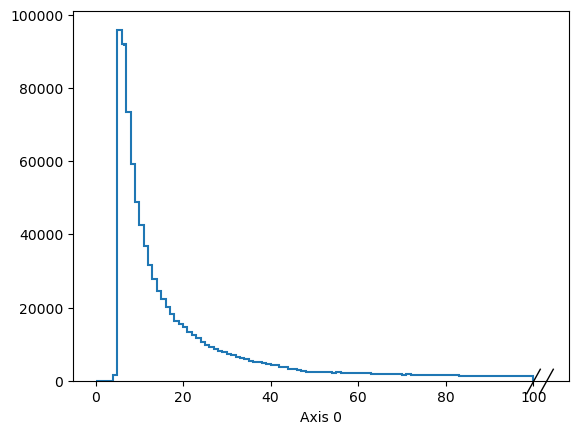

In [6]:
hist.Hist.new.Reg(100,0,100).Double().fill(ak.flatten(events.Electron.pt)).plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efa223d4670>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

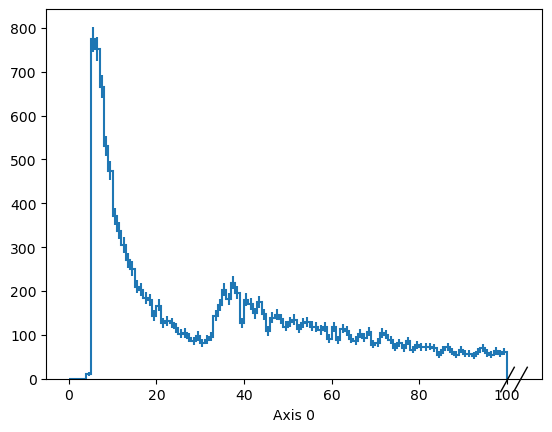

In [7]:
hist.Hist.new.Reg(100,0,100).Double().fill(ak.flatten(triggered_events.Electron.pt)).plot()

In [8]:
print(ak.sum(ak.num(events.Electron)))
Etagap = ( events.Electron.eta < 1.4442 ) | ( events.Electron.eta > 1.566 )
elePassDXY = ((abs(events.Electron.eta) < 1.479) & (abs(events.Electron.dxy) < 0.05)) | ((abs(events.Electron.eta) > 1.479) & (abs(events.Electron.dxy) < 0.1))
elePassDZ = ((abs(events.Electron.eta) < 1.479) & (abs(events.Electron.dz) < 0.1)) | ((abs(events.Electron.eta) > 1.479) & (abs(events.Electron.dz) < 0.2))
Eta = abs( events.Electron.eta ) < 2.5
Pt = events.Electron.pt > 40.0 
Id = events.Electron.cutBased == 4 #meaning only tight electrons 

final_cut = Etagap & elePassDXY & elePassDZ & Eta & Pt & Id
all_tight = events.Electron[final_cut]
one_tight_cut = ak.num(all_tight , axis=1) == 1
goodevents = events[one_tight_cut]
ha = events.Electron[final_cut]
singles = ha[ak.num(ha)==1] 
print(ak.sum(ak.num(singles)))

1033303
8535


In [9]:
events.Electron.dz.__doc__

'dz (with sign) wrt first PV, in cm'

In [10]:
ak.sum(ak.num(events.Electron))

1033303

In [11]:
ak.sum(ak.num(events.Electron[events.Electron.cutBased == 4]))

18516

In [13]:
print(ak.sum(ak.num(events.Electron)))
Etagap = ( events.Electron.eta < 1.4442 ) | ( events.Electron.eta > 1.566 )
ele1 = events.Electron[Etagap]
print(ak.sum(ak.num(ele1)))
elePassDXY = ((abs(ele1.eta) < 1.479) & (abs(ele1.dxy) < 0.05)) | ((abs(ele1.eta) > 1.479) & (abs(ele1.dxy) < 0.1))
ele2 = ele1[elePassDXY]
print(ak.sum(ak.num(ele2)))
elePassDZ = ((abs(ele2.eta) < 1.479) & (abs(ele2.dz) < 0.1)) | ((abs(ele2.eta) > 1.479) & (abs(ele2.dz) < 0.2))
ele3 = ele2[elePassDZ]
print(ak.sum(ak.num(ele3)))
Eta = abs(ele3.eta ) < 2.5
ele4 = ele3[Eta]
print(ak.sum(ak.num(ele4)))
Pt = ele4.pt > 40.0 
ele5 = ele4[Pt]
print(ak.sum(ak.num(ele5)))
Id = ele5.cutBased == 4 #meaning only tight electrons 
ele6 = ele5[Id]
print(ak.sum(ak.num(ele6)))

1033303
1014400
904831
742038
728838
206783
8879


In [16]:
print(ak.sum(ak.num(events.Electron)))
trigger = events.HLT.Ele32_WPTight_Gsf
events0 = events[trigger]
print(ak.sum(ak.num(events0.Electron)))
Etagap = ( events0.Electron.eta < 1.4442 ) | ( events0.Electron.eta > 1.566 )
ele1 = events0.Electron[Etagap]
print(ak.sum(ak.num(ele1)))
elePassDXY = ((abs(ele1.eta) < 1.479) & (abs(ele1.dxy) < 0.05)) | ((abs(ele1.eta) > 1.479) & (abs(ele1.dxy) < 0.1))
ele2 = ele1[elePassDXY]
print(ak.sum(ak.num(ele2)))
elePassDZ = ((abs(ele2.eta) < 1.479) & (abs(ele2.dz) < 0.1)) | ((abs(ele2.eta) > 1.479) & (abs(ele2.dz) < 0.2))
ele3 = ele2[elePassDZ]
print(ak.sum(ak.num(ele3)))
Eta = abs(ele3.eta ) < 2.5
ele4 = ele3[Eta]
print(ak.sum(ak.num(ele4)))
Pt = ele4.pt > 40.0 
ele5 = ele4[Pt]
print(ak.sum(ak.num(ele5)))
Id = ele5.cutBased == 4 #meaning only tight electrons 
ele6 = ele5[Id]
print(ak.sum(ak.num(ele6)))
one_tight_cut = ak.num(ele6 , axis=1) == 1
goodevents = events[one_tight_cut]
singles = goodevents.Electron 
print(ak.sum(ak.num(singles)))

1033303
20194
19867
18745
17021
16844
10917
6605
2144
